In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
k = 0.024 # K/uV
P_0 = 8.252
dP_0 = 0.001
dT = 0.01
dU = 1
dP = 0.001

data_raw = pd.read_csv('data.csv')
data_raw

,T_w,U,P
0,11.09,-4,10.1612
1,13.07,-7,10.1070
2,14.05,-9,10.0683
3,16.06,-7,9.9403
4,18.02,-14,9.7542
5,20.02,-14,9.4331
6,22.03,-14,9.0214
7,24.01,-17,8.7452
8,26.02,-18,8.6090
9,28.01,-20,8.5355


In [15]:
print(data_raw.style.to_latex())

\begin{tabular}{lrrr}
 & T_w & U & P \\
0 & 11.090000 & -4 & 10.161200 \\
1 & 13.070000 & -7 & 10.107000 \\
2 & 14.050000 & -9 & 10.068300 \\
3 & 16.060000 & -7 & 9.940300 \\
4 & 18.020000 & -14 & 9.754200 \\
5 & 20.020000 & -14 & 9.433100 \\
6 & 22.030000 & -14 & 9.021400 \\
7 & 24.010000 & -17 & 8.745200 \\
8 & 26.020000 & -18 & 8.609000 \\
9 & 28.010000 & -20 & 8.535500 \\
10 & 30.010000 & -20 & 8.487500 \\
11 & 32.000000 & -20 & 8.453900 \\
12 & 34.000000 & -20 & 8.429000 \\
13 & 36.000000 & -31 & 8.412600 \\
14 & 37.980000 & -33 & 8.398400 \\
15 & 39.950000 & -42 & 8.387400 \\
\end{tabular}



In [16]:
data = pd.DataFrame(columns=["T", "dT", "P", "dP", "X", "dX", "Y", "dY"])

data["P"] = data_raw["P"]
data["dP"] = dP

data["T"] = data_raw["T_w"] + data_raw["U"] * k
data["dT"] = (dT**2 + (k*dU)**2)**0.5

data["X"] = data["T"]
data["dX"] = data["dT"]

data["Y"] = 1 / (data["P"]**2 - P_0**2)
data["dY"] = ((2*data["P"]*data["Y"]**2*data["dP"])**2 + (2*P_0*data["Y"]**2*dP_0)**2)**0.5

data

,T,dT,P,dP,X,dX,Y,dY
0,10.994,0.026,10.1612,0.001,10.994,0.026,0.028446,0.000021
1,12.902,0.026,10.1070,0.001,12.902,0.026,0.029363,0.000023
2,13.834,0.026,10.0683,0.001,13.834,0.026,0.030052,0.000024
3,15.892,0.026,9.9403,0.001,15.892,0.026,0.032558,0.000027
4,17.684,0.026,9.7542,0.001,17.684,0.026,0.036970,0.000035
5,19.684,0.026,9.4331,0.001,19.684,0.026,0.047875,0.000057
6,21.694,0.026,9.0214,0.001,21.694,0.026,0.075244,0.000138
7,23.602,0.026,8.7452,0.001,23.602,0.026,0.119289,0.000342
8,25.588,0.026,8.6090,0.001,25.588,0.026,0.166130,0.000658
9,27.530,0.026,8.5355,0.001,27.530,0.026,0.210117,0.001048


In [23]:
print(data.style.to_latex())

\begin{tabular}{lrrrrrrrr}
 & T & dT & P & dP & X & dX & Y & dY \\
0 & 10.994000 & 0.026000 & 10.161200 & 0.001000 & 10.994000 & 0.026000 & 0.028446 & 0.000021 \\
1 & 12.902000 & 0.026000 & 10.107000 & 0.001000 & 12.902000 & 0.026000 & 0.029363 & 0.000023 \\
2 & 13.834000 & 0.026000 & 10.068300 & 0.001000 & 13.834000 & 0.026000 & 0.030052 & 0.000024 \\
3 & 15.892000 & 0.026000 & 9.940300 & 0.001000 & 15.892000 & 0.026000 & 0.032558 & 0.000027 \\
4 & 17.684000 & 0.026000 & 9.754200 & 0.001000 & 17.684000 & 0.026000 & 0.036970 & 0.000035 \\
5 & 19.684000 & 0.026000 & 9.433100 & 0.001000 & 19.684000 & 0.026000 & 0.047875 & 0.000057 \\
6 & 21.694000 & 0.026000 & 9.021400 & 0.001000 & 21.694000 & 0.026000 & 0.075244 & 0.000138 \\
7 & 23.602000 & 0.026000 & 8.745200 & 0.001000 & 23.602000 & 0.026000 & 0.119289 & 0.000342 \\
8 & 25.588000 & 0.026000 & 8.609000 & 0.001000 & 25.588000 & 0.026000 & 0.166130 & 0.000658 \\
9 & 27.530000 & 0.026000 & 8.535500 & 0.001000 & 27.530000 & 0.026000 & 0.2

In [24]:
mnk_slice = slice(6, None)
X = data["X"][mnk_slice]
Y = data["Y"][mnk_slice]

def mnk(X, Y):
    a, b = np.polyfit(X, Y, deg=1)
    
    S_x = np.std(X) ** 2
    S_y = np.std(Y) ** 2
    da = 2 * np.sqrt((S_y/S_x - a ** 2)/(len(X) - 2))
    db = da * np.sqrt(np.mean(X**2))
    
    def f(x):
        return a*x + b
    
    return a, b, da, db, f

a, b, da, db, f = mnk(X, Y)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


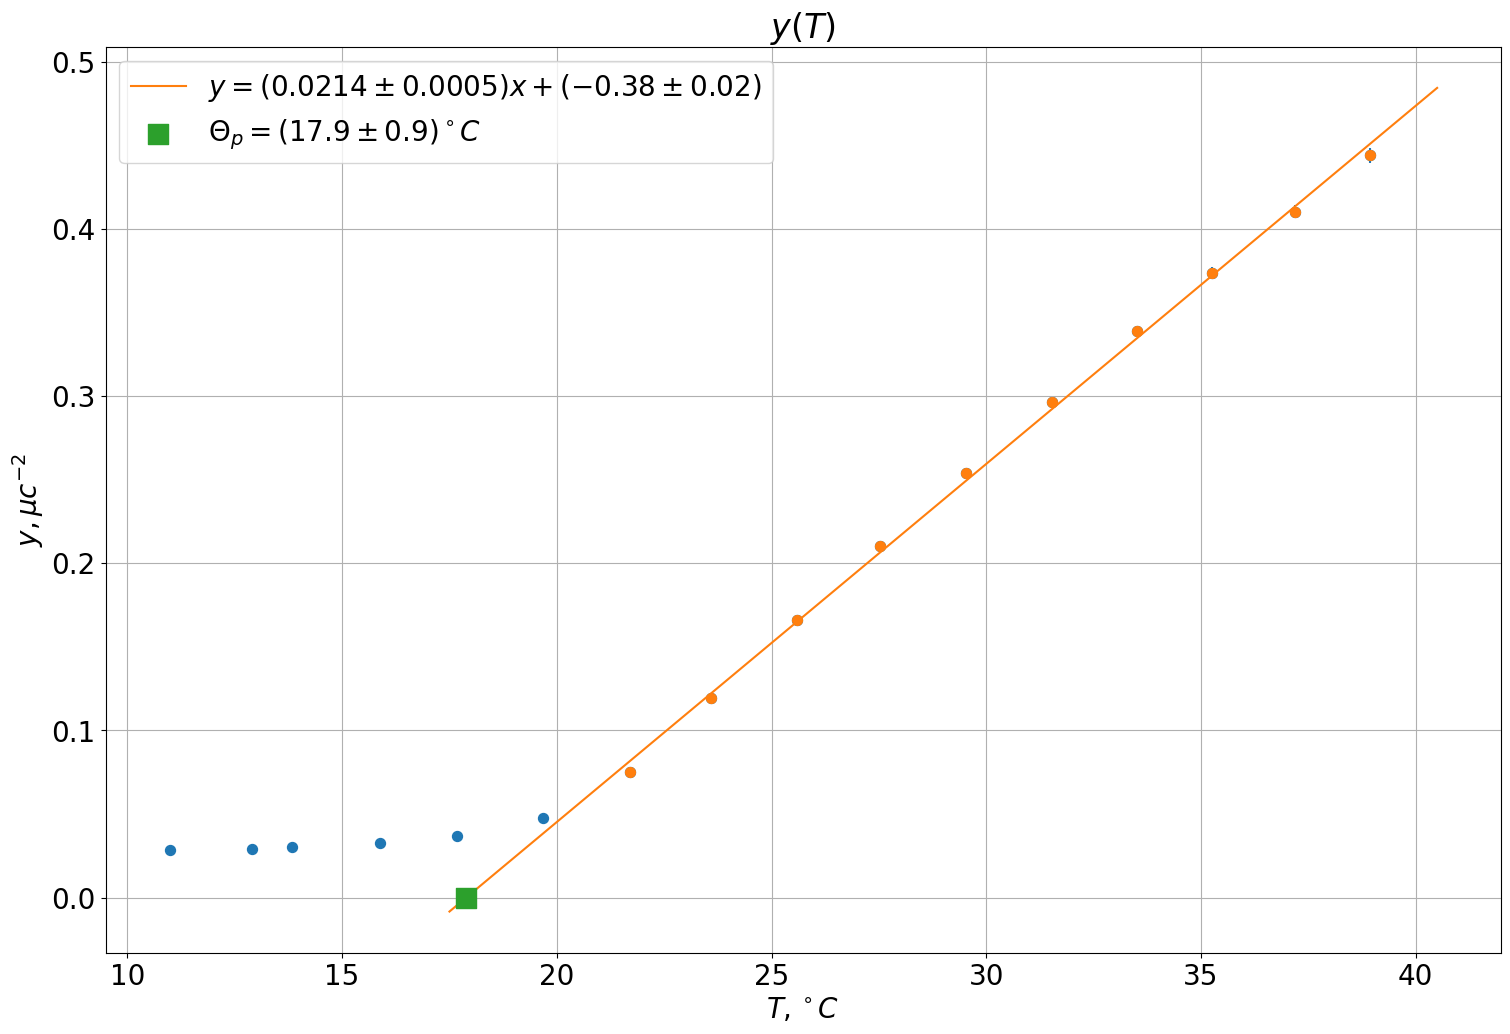

In [39]:
plt.figure(figsize=(18, 12), dpi=100)
plt.rcParams['font.size'] = 20
plt.grid(True)
plt.title(r"$y(T)$")
plt.xlabel(r"$T, ^\circ C$")
plt.ylabel(r"$y,\mu с^{-2}$")

plt.scatter(data["X"], data["Y"], s=51)
plt.errorbar(data["X"], data["Y"], xerr=data["dX"], yerr=data["dY"], linestyle='', zorder=0)

plt.scatter(X, Y, s=50)
x = np.array([17.5, 40.5])
plt.plot(x, f(x), label=f"$y=({a:.4f}\pm{da:.1})x+({b:.2f}\pm{db:.1})$")

T_p = -b/a
dT_p = abs(T_p) * ((db/b)**2 + (da/a)**2)**0.5

plt.scatter([T_p], [0], zorder=10, s=200, marker='s', label=f"$\Theta_p=({T_p:.1f} \pm {dT_p:.1}) ^\circ C$")

plt.legend()
plt.savefig('../pictures/plot.eps')

(17.88836641951962, 0.9026649355580112)

In [88]:
273.15+T_p

291.0383664195196